# Fraudulent Provider Dataset Construction (PART 3)
## STEP 1
* Resolve Any Matching Issues and Map Identified Providers to NPI
* Create Fraudulent Provider Listing

In [1]:
# Import Pyhon libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import json
from easydict import EasyDict as edict
import ast

In [2]:
# Load State Abbreviations 
df_state_abbrev = pd.read_csv('state_abbrev.csv')
df_state_abbrev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      52 non-null     object 
 1   latitude   52 non-null     float64
 2   longitude  52 non-null     float64
 3   name       52 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.8+ KB


In [3]:
df_state_abbrev['name'].sample(5)

32      New Mexico
15         Indiana
10         Georgia
28    North Dakota
8         Delaware
Name: name, dtype: object

In [4]:
# Create listing of state names
state_names = df_state_abbrev['name'].to_list()
print (state_names)

['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'California', 'Colorado', 'Connecticut', 'District of Columbia', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Massachusetts', 'Maryland', 'Maine', 'Michigan', 'Minnesota', 'Missouri', 'Mississippi', 'Montana', 'North Carolina', 'North Dakota', 'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico', 'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia', 'Wyoming']


In [5]:
# Create listing of state codes / abbreviations
state_codes = df_state_abbrev['state'].to_list()
print (state_codes)

['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']


### NPPES Results Clean-up and Analysis

In [6]:
# Load NPPES Results 
df_nppes_results = pd.read_csv('nppes_results.csv')
df_nppes_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 860 entries, 0 to 859
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   result_count  860 non-null    int64 
 1   results       860 non-null    object
 2   release_date  860 non-null    object
 3   release_url   860 non-null    object
dtypes: int64(1), object(3)
memory usage: 27.0+ KB


In [7]:
df_nppes_results.shape

(860, 4)

In [8]:
df_nppes_results.head(5)

,result_count,results,release_date,release_url
0,2,"{'enumeration_type': 'NPI-1', 'number': 117467...",2020-03-10T00:00:00-04:00,https://www.justice.gov/opa/pr/national-compre...
1,2,"{'enumeration_type': 'NPI-1', 'number': 174073...",2020-03-10T00:00:00-04:00,https://www.justice.gov/opa/pr/national-compre...
2,2,"{'enumeration_type': 'NPI-1', 'number': 117467...",2020-03-10T00:00:00-04:00,https://www.justice.gov/opa/pr/national-compre...
3,2,"{'enumeration_type': 'NPI-1', 'number': 174073...",2020-03-10T00:00:00-04:00,https://www.justice.gov/opa/pr/national-compre...
4,1,"{'enumeration_type': 'NPI-1', 'number': 191292...",2020-02-26T00:00:00-05:00,https://www.justice.gov/opa/pr/tennessee-podia...


In [9]:
# Load Entity Archive 
df_entity_archive = pd.read_csv('entity_archive.csv')
df_entity_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21112 entries, 0 to 21111
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   text          21112 non-null  object 
 1   start_pos     7837 non-null   float64
 2   end_pos       7837 non-null   float64
 3   entity_type   21112 non-null  object 
 4   release_date  21112 non-null  object 
 5   release_url   21112 non-null  object 
dtypes: float64(2), object(4)
memory usage: 989.8+ KB


In [10]:
df_entity_archive.shape

(21112, 6)

In [11]:
df_entity_archive.sample(5)

,text,start_pos,end_pos,entity_type,release_date,release_url
710,showed,NaN,NaN,VERB,2020-02-04T00:00:00-05:00,https://www.justice.gov/opa/pr/four-detroit-ar...
10055,was,NaN,NaN,VERB,2018-08-22T00:00:00-04:00,https://www.justice.gov/opa/pr/two-chinese-nat...
2389,charged,NaN,NaN,VERB,2019-10-17T00:00:00-04:00,https://www.justice.gov/opa/pr/kentucky-physic...
20927,facilitate,NaN,NaN,VERB,2015-01-07T00:00:00-05:00,https://www.justice.gov/opa/pr/fbi-arrests-def...
972,raised,NaN,NaN,VERB,2020-02-03T00:00:00-05:00,https://www.justice.gov/opa/pr/federal-court-o...


In [12]:
# Create dataframe of all identified verbs in all press releases
df_verbs = df_entity_archive.loc[df_entity_archive['entity_type'] == 'VERB']
df_verbs.shape

(13275, 6)

In [13]:
# Standardize string formatting and determine use counts
df_verbs_clean = pd.DataFrame()
df_verbs_clean = df_verbs.copy()
df_verbs_clean['text_clean'] = df_verbs_clean['text'].apply(lambda x:x.lower())

df_verbs_counts = df_verbs_clean[[
    'text_clean',
    'entity_type'
]].groupby(['text_clean']).count().reset_index()

df_verbs_counts

,text_clean,entity_type
0,'re,1
1,'s,3
2,abandon,1
3,abandoned,1
4,abducted,2
...,...,...
1875,written,7
1876,wrote,28
1877,years,1
1878,yield,2


In [15]:
# Sort and display more frequently found verbs
df_verbs_counts = df_verbs_counts.sort_values(['entity_type'], ascending=False)
df_verbs_counts.head(20)

,text_clean,entity_type
964,is,594
120,are,452
1845,was,344
386,controlled,292
1857,will,291
819,has,281
1856,were,274
820,have,230
273,charged,226
1505,said,196


In [16]:
# Create dataset of targeted verbs to see counts
df_key_verbs = df_verbs_counts.loc[df_verbs_counts['text_clean'].isin(
    ['pled', 
     'pleaded', 
     'conspire',
     'conspired', 
     'arraigned', 
     'alleged', 
     'charged', 
     'distribute',
     'distributed',
     'investigated',
     'investigate',
     'prosecute',
     'prosecuted']
)].reset_index()

df_key_verbs

,index,text_clean,entity_type
0,273,charged,226
1,537,distribute,102
2,1246,pleaded,86
3,1313,prosecuted,76
4,954,investigated,73
5,84,alleged,70
6,1312,prosecute,31
7,538,distributed,27
8,953,investigate,23
9,360,conspired,17


In [17]:
df_verbs_clean.sample(5)

,text,start_pos,end_pos,entity_type,release_date,release_url,text_clean
8146,holding,NaN,NaN,VERB,2019-02-08T00:00:00-05:00,https://www.justice.gov/opa/pr/justice-departm...,holding
9517,should,NaN,NaN,VERB,2018-09-20T00:00:00-04:00,https://www.justice.gov/opa/pr/houston-physici...,should
13323,working,NaN,NaN,VERB,2018-04-10T00:00:00-04:00,https://www.justice.gov/opa/pr/acting-assistan...,working
18795,is,NaN,NaN,VERB,2016-11-10T00:00:00-05:00,https://www.justice.gov/opa/pr/attorney-genera...,is
20163,was,NaN,NaN,VERB,2016-05-12T00:00:00-04:00,https://www.justice.gov/opa/pr/kentucky-anesth...,was


In [18]:
# Create dataset for press releases which used targeted verbs
df_fraud_releases =  df_verbs_clean.loc[df_verbs_clean['text_clean'].isin(
    ['pled', 
     'pleaded', 
     'conspire',
     'conspired', 
     'arraigned', 
     'alleged', 
     'charged', 
     'distribute',
     'distributed',
     'investigated',
     'investigate',
     'prosecute',
     'prosecuted'
    ]
)].reset_index()

df_fraud_releases.sample(5)

,index,text,start_pos,end_pos,entity_type,release_date,release_url,text_clean
476,8419,distribute,NaN,NaN,VERB,2018-11-07T00:00:00-05:00,https://www.justice.gov/opa/pr/co-owners-miami...,distribute
506,9317,charged,NaN,NaN,VERB,2018-10-22T00:00:00-04:00,https://www.justice.gov/opa/pr/eight-new-orlea...,charged
317,4987,pleaded,NaN,NaN,VERB,2019-09-18T00:00:00-04:00,https://www.justice.gov/opa/pr/texas-health-ca...,pleaded
435,7460,prosecute,NaN,NaN,VERB,2019-04-17T00:00:00-04:00,https://www.justice.gov/opa/pr/appalachian-reg...,prosecute
716,20500,distribute,NaN,NaN,VERB,2015-07-28T00:00:00-04:00,https://www.justice.gov/opa/pr/colombian-natio...,distribute


In [19]:
# Display unique press release URLs which used targeted verbs
release_ids = df_fraud_releases['release_url'].unique()
id_list = release_ids.tolist()
print (id_list)

['https://www.justice.gov/opa/pr/owner-detroit-area-health-care-clinic-sentenced-prison-drug-diversion-scheme', 'https://www.justice.gov/opa/pr/tennessee-podiatrist-pleads-guilty-unlawfully-distributing-controlled-substances', 'https://www.justice.gov/opa/pr/west-tennessee-psychiatrist-found-guilty-unlawfully-distributing-opioids', 'https://www.justice.gov/opa/pr/ohio-doctor-pleads-guilty-unlawful-distribution-opioids-0', 'https://www.justice.gov/opa/pr/federal-jury-convicts-four-defendants-operating-knoxville-area-pill-mills', 'https://www.justice.gov/opa/pr/four-detroit-area-physicians-found-guilty-health-care-fraud-charges-role-over-150-million', 'https://www.justice.gov/opa/pr/federal-court-orders-north-carolina-pharmacy-and-pharmacist-pay-600000-and-permanently-cease', 'https://www.justice.gov/opa/pr/alabama-physician-pleads-guilty-drug-distribution-charges-prescription-opioids', 'https://www.justice.gov/opa/pr/pennsylvania-doctor-pleads-guilty-unlawfully-distributing-oxycodone-hi

In [21]:
# Create dataset of NPPES results filtered for press releases that used targeted verbs
df_filtered = df_nppes_results.loc[df_nppes_results['release_url'].isin(id_list)]
df_filtered.shape

(851, 4)

Text(0, 0.5, 'Record Count')

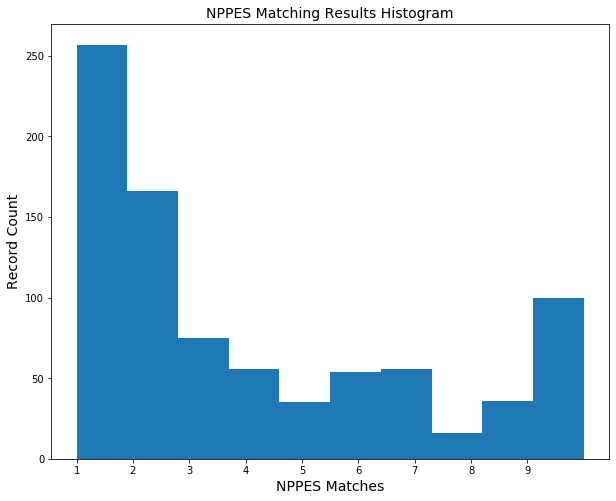

In [22]:
# Histogram of NPPES matching results 
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(df_filtered['result_count'], bins=10)
ax.set_xticks(range(1,10,1))
ax.set_title('NPPES Matching Results Histogram', fontsize=14)
ax.set_xlabel('NPPES Matches', fontsize=14)
ax.set_ylabel('Record Count', fontsize=14)

### OF NOTE:
* Nine press releases previously included were removed since did not contain language likely related to fraud cases.
* Removed press releases likely policy based.

## Process NPPES Results and Perform NPI Resolution

In [86]:
# Create dataset of relevant NPPES Results
df_hits = df_filtered.copy()
df_hits.shape

(851, 4)

In [87]:
# loop through results and save resolved NPIs to dataframe for export

# Create empty dataframe for NLP results
df_resolved_npi = pd.DataFrame(
    columns=[
        'npi',
        'press_release_date',
        'press_release_url'
    ]
)

# Loop through all hits
for row in df_hits.itertuples():

    # Add results with only 1 NPI match into Resolved NPI Dataframe
    if row.result_count == 1:
        api_results = row.results
        my_dict = ast.literal_eval(api_results)
        df_resolved_npi = df_resolved_npi.append(
            {
                'npi': str(my_dict.get('number')),
                'press_release_date': row.release_date,
                'press_release_url': row.release_url,
            }, 
            ignore_index=True
        )

    else:     # Results with more than one NPI returned    
        
        df_search = pd.DataFrame()
    
        # Find all GPEs in press release archive 
        df_search = df_entity_archive.loc[(df_entity_archive['release_url'] == row.release_url) & (df_entity_archive['entity_type'] == 'GPE')]

        # Remove irrelevant GPE: U.S., United States, state names ...
        df_search = df_search[df_search['text'] != 'U.S.']
        df_search = df_search[df_search['text'] != 'the United States']
        df_search = df_search[df_search['text'] != 'M.D.']
        df_search = df_search[df_search['text'] != 'US']
        df_search = df_search[df_search['text'] != 'America']
        df_search = df_search[~df_search['text'].isin(state_names)]
        df_search = df_search[~df_search['text'].isin(state_codes)]

        # Loop through listing of likely cities and if match found, add to Resolved NPI Dataframe
        for city in df_search.itertuples():

            city_name = city.text.upper()

            found = city_name in row.results

            if found:

                #print (row.release_url)
                #print (city_name + ': ' + str(found))

                api_results = row.results
                my_dict = ast.literal_eval(api_results)
                #print (str(my_dict.get('number')))

                df_resolved_npi = df_resolved_npi.append(
                    {
                        'npi': str(my_dict.get('number')),
                        'press_release_date': row.release_date,
                        'press_release_url': row.release_url,
                    }, 
                    ignore_index=True
                )       

In [89]:
df_resolved_npi.shape

(615, 3)

In [90]:
# Remove duplicate NPIs
df_dedupe = df_resolved_npi.drop_duplicates(subset='npi')
df_dedupe.shape

(301, 3)

In [91]:
df_dedupe.sample(10)

,npi,press_release_date,press_release_url
208,1740349505,2019-08-29T00:00:00-04:00,https://www.justice.gov/opa/pr/louisiana-physi...
419,1174908230,2019-04-17T00:00:00-04:00,https://www.justice.gov/opa/pr/appalachian-reg...
565,1265407100,2017-08-02T00:00:00-04:00,https://www.justice.gov/opa/pr/attorney-genera...
399,1841316726,2019-08-28T00:00:00-04:00,https://www.justice.gov/opa/pr/charges-filed-a...
209,1891208831,2019-08-28T00:00:00-04:00,https://www.justice.gov/opa/pr/charges-filed-a...
507,1609808534,2018-10-25T00:00:00-04:00,https://www.justice.gov/opa/pr/justice-departm...
423,1396044590,2019-04-17T00:00:00-04:00,https://www.justice.gov/opa/pr/appalachian-reg...
445,1750587713,2019-03-13T00:00:00-04:00,https://www.justice.gov/opa/pr/philadelphia-ar...
174,1093839094,2019-09-18T00:00:00-04:00,https://www.justice.gov/opa/pr/texas-health-ca...
4,1013082890,2020-02-21T00:00:00-05:00,https://www.justice.gov/opa/pr/ohio-doctor-ple...


In [94]:
# Output file with fraudulent NPIs
df_dedupe.to_csv('fraudulent_npi.csv', index=False)

### Backup code

In [ ]:
# Filter NPPES results for direct matches only
# NOTE: To be removed in Part 4 and NPI resolution will be improved 
df_hits = df_nppes_results.loc[df_nppes_results['result_count'] == 1].reset_index()
df_hits

In [ ]:
# Retrieve NPI from stored JSON output of NPPES API Call
nppes_output = df_hits.to_dict('records')

df_identified_provider = pd.DataFrame()

for i in nppes_output:
    api_results = i.get("results")
    my_dict = ast.literal_eval(api_results)
    
    df_identified_provider = df_identified_provider.append({'fraudulent_npi': str(my_dict.get('number'))}, ignore_index=True)
    
df_identified_provider['fraudulent_npi']

In [ ]:
df_hits['index']

In [ ]:
#output = df_temp['results'][13].to_dict('records')
api_results = df_temp['results'][13]
my_dict = ast.literal_eval(api_results)
#print (str(my_dict.get('addresses').get('city')))
print (str(my_dict.get('addresses')[0].get('city')))